<a href="https://colab.research.google.com/github/Sarita2M/git_coding/blob/main/Chennai_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Chennai House Price Prediction***









  # **Problem Statement**



Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


# **Data**

The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

# **Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [5]:
df = pd.read_csv('/content/train-chennai-sale (1).csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
df.shape

(7109, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

## Droping the unwanted columns

In [8]:
df = df.drop(['PRT_ID','REG_FEE','COMMIS',],axis='columns')
df.head()


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


## Checking Missing Values

In [9]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

## Data Cleaning

Imputing the Values

In [10]:
print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [11]:
df['N_BEDROOM'].fillna('1.0',inplace =True)

In [12]:
df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
1.0       1
Name: N_BEDROOM, dtype: int64

In [13]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [14]:
df['N_BATHROOM'].fillna('1.0',inplace =True)

In [15]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [16]:
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(),inplace = True)

In [18]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

# Dropping the Duplicates

In [19]:
df = df.drop_duplicates()

In [20]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

Checking for the datatype

In [21]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

# Changing to proper Datatype

Correcting Date_sale,Date_build into Date time Format and N_Bedroom and N_Bathroom into integers

In [24]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format = '%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format = '%d-%m-%Y')
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

Creating Age column inplace of Date Sale and Date Build columns

In [25]:
df["AGE"] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [26]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

Changed Datatype

In [27]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


Describing the Numerical Columns

In [28]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


# Checking the outliers

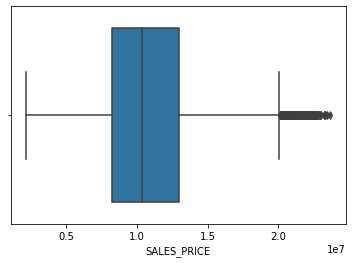

In [29]:
sns.boxplot(df['SALES_PRICE'])

# Finding IQR

In [30]:
percentile25 = df['SALES_PRICE'].quantile(0.25)
percentile75 = df['SALES_PRICE'].quantile(0.75)
print('25th percentile of the data is',percentile25)
print('75th percentile of the data is',percentile75)
print('IQR:',percentile75-percentile25)

25th percentile of the data is 8272100.0
75th percentile of the data is 12993900.0
IQR: 4721800.0


Calculating Max and Min Values

In [31]:
max_value = percentile75 + 1.5*(percentile75-percentile25)
min_value = percentile25 - 1.5*(percentile75-percentile25)
print(max_value)
print(min_value)

20076600.0
1189400.0


# Correcting the Spelling Mistakes

In [32]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [33]:
df['AREA'].replace(['Karapakam',],'Karapakkam',inplace = True)
df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace = True)
df['AREA'].replace(['Adyr'],'Adyar',inplace = True)
df['AREA'].replace(['Velchery','Velachery'],inplace = True)
df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace = True)
df['AREA'].replace(['KKNagar'],'KK Nagar',inplace = True)
df['AREA'].replace(['TNagar',],'T Nagar',inplace = True)

df['SALE_COND'].replace(['AbNormal','A b Normal'],'Abnormal',inplace = True)
df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial',inplace = True)
df['SALE_COND'].replace(['Adj Land'],'AdjLand',inplace = True)

df['PARK_FACIL'].replace(['Noo'],'No',inplace = True)

df['BUILDTYPE'].replace(['Others'],'Other',inplace = True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['AllPub',],'All Pub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr '],'No Sewar',inplace=True)
df['STREET'].replace(["Pavd"],'Paved',inplace=True)
df['STREET'].replace(["NoAccess"],'No Access',inplace=True)

In [34]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Chrompet' 'KK Nagar' 'T Nagar']
['Abnormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal']
['Yes' 'No']
['Commercial' 'Other' 'House']
['All Pub' 'ELO' 'No Sewar']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


After checking the spelling mistakes the columns are cleaned

In [35]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

EDA for Categorical Columns

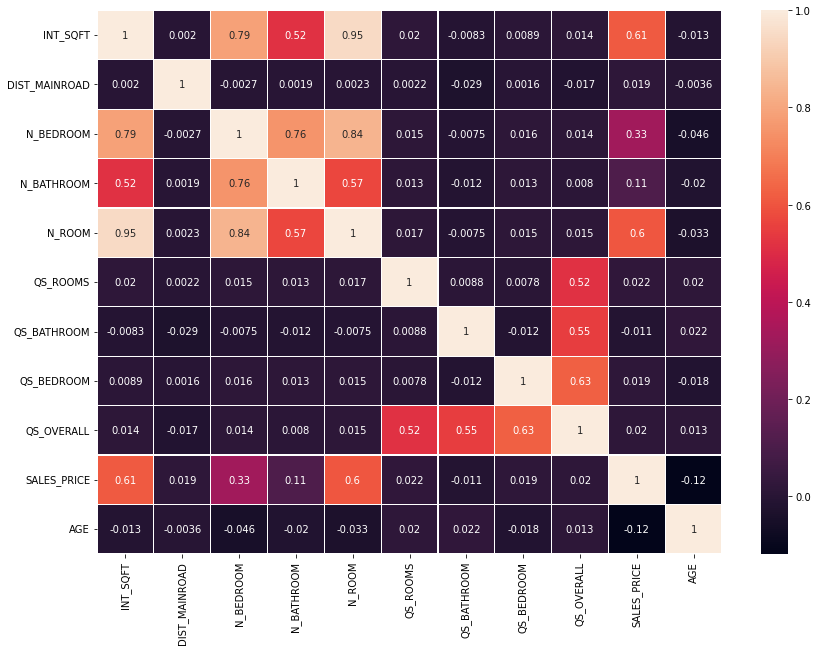

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

SALE_PRICE is the taget variable and INT_SQFT,N_BEDROOM,N_BATHROOM are showing high correlation

# Checking relationship between Area and sales Price 

In [37]:
Area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

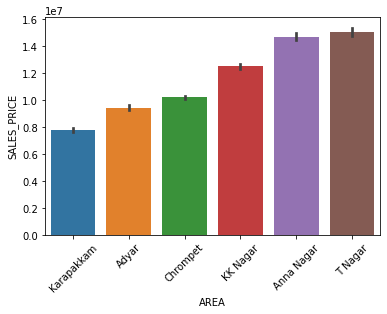

In [38]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = Area_order)
plt.xticks(rotation=45)

There is a linear relationship so AREA is important relationship we are doing label Encoding.

# Checking relationship between SALE_COND and SALE_PRICE

In [39]:
Sale_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

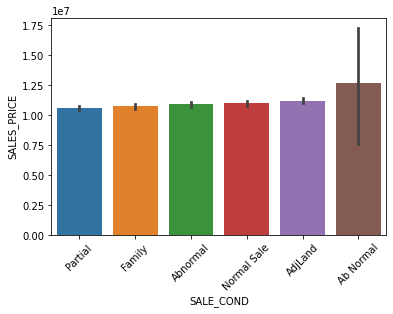

In [40]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = Sale_order)
plt.xticks(rotation=45)

There is no relation between sales price and sales condition so we will drop it.

# Checking Relationship between PARK_FACIL and SALES_PRICE

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

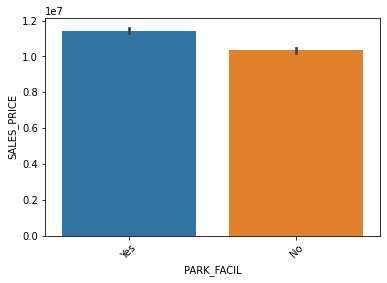

In [41]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=45)

For Binary Categorical Data and it has linear relationshipfor that we do label encoding

# Relationship between BUILDTYPE and SALES PRICE

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

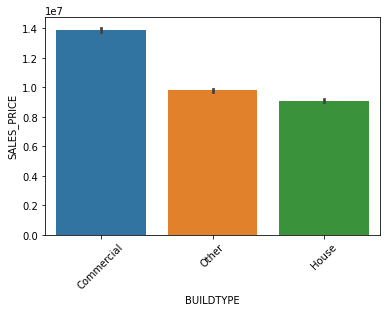

In [42]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)
plt.xticks(rotation=45)

There is a no linear relationship then we do Onehot Encoding

# Relationship between Utility Availability and Sales Price

In [43]:
Utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

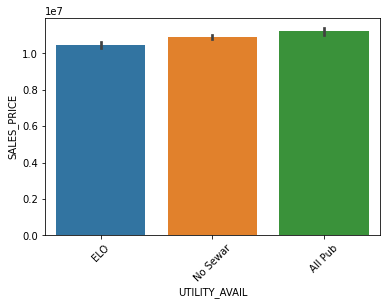

In [44]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order = Utility_order)
plt.xticks(rotation=45)

There is linear relationship for that we will do label Encoding

# Relationship between Street and Sales Price

In [45]:
Street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

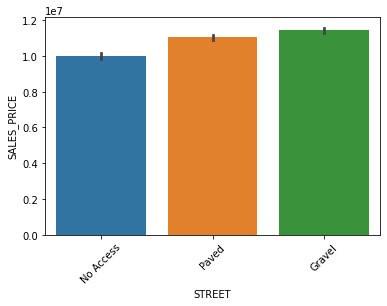

In [46]:
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = Street_order)
plt.xticks(rotation=45)

There is Linear relationship so we do Label Encoding

# Relationship Between MZZONE and Sales Price

In [47]:
Mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']

In [48]:
Street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']

There is a Peice Linear relationship between them and then we will do label Encoding

# Relationship between N_Bedroom and Sales Price

In [49]:
Bedroom_order = df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']

There no Encoding is required as it is a numerical data

# Relationship between N_Bathroom and Sales Price

In [50]:
Bathroom_order = df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

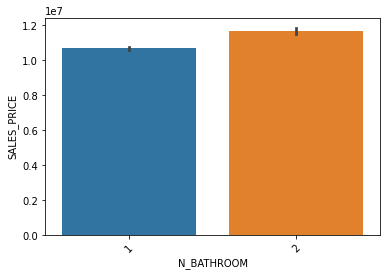

In [51]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df,order = Bathroom_order)
plt.xticks(rotation=45)

# Relationship between Sales Price and N_Room

In [52]:
Room_order = df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

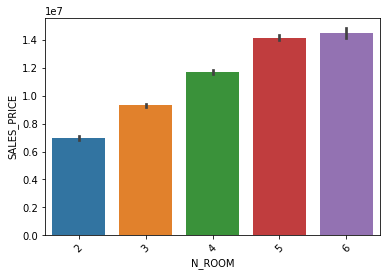

In [53]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df,order = Room_order)
plt.xticks(rotation=45)

# Relationship between Int_sqrft and Sales Price

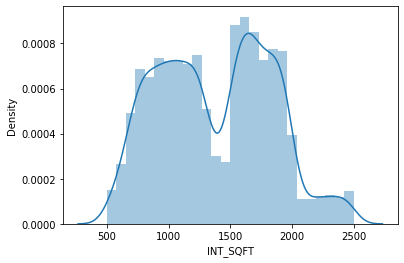

In [54]:
sns.distplot(df['INT_SQFT'])

There is linear relationship

# Relationship between Dist_Mainroad and Sales Prices

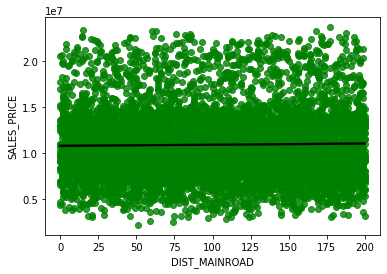

In [55]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'green'},line_kws={'color':'black'})

# Relationship between QS Room,Bathroom,Bedroom ,All room and Sales Prices

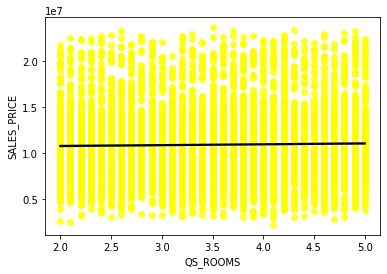

In [56]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'yellow'},line_kws={'color':'black'})

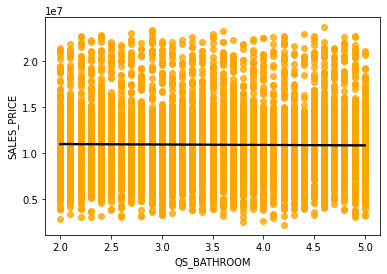

In [57]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'black'})

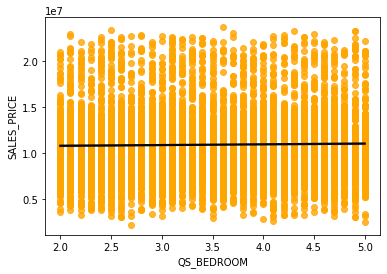

In [58]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'black'})

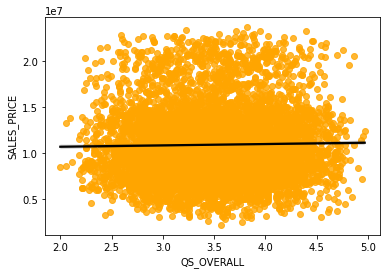

In [59]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'black'})

There is no relationship between QS_ROOM,QS_BATHROOM<QS_BEDROOM,QS_OVERALL so we can drop them.

# Relationship between Age and Sales Prices

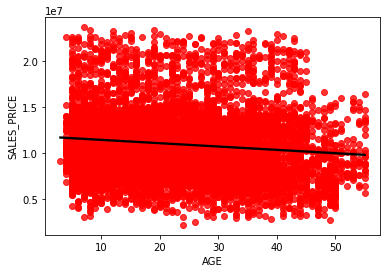

In [60]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'red'},line_kws={'color':'black'})

There is negetive relationship between Age and Sales Price.This will we useful to do futher analysis.

# Insights

1. The data in all the Colunms
are normally Distributed.
2. INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM ,Age have linear relationship between Sales Prices and will we very useful in training the model.
3. DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL have no realationship between them so we will drop them.


In [61]:
df.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DATE_BUILD','DATE_SALE',],axis=1,inplace=True)

In [63]:
df.drop(['SALE_COND'],axis=1,inplace=True)

# Sales Price

In [65]:
df.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [66]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [67]:
df.SALES_PRICE.isnull().sum()

0

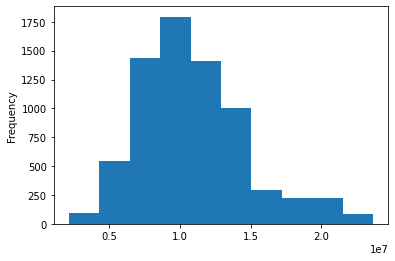

In [68]:
df.SALES_PRICE.plot(kind='hist')

Sales Price is normally distributed.

In [69]:
df.duplicated().sum()

0

In [70]:
df.corr()['SALES_PRICE'].sort_values(ascending= False)

SALES_PRICE    1.000000
INT_SQFT       0.612125
N_ROOM         0.602760
N_BEDROOM      0.330987
N_BATHROOM     0.108834
AGE           -0.118842
Name: SALES_PRICE, dtype: float64

# **Model Building**

# **Linear Regression Model**

In [71]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Adyar,1855,3,2,5,No,Other,No Sewar,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,All Pub,Gravel,C,7406250,30


# Encoding the data

In [81]:
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1,'No': 0})

In [82]:
df = pd.get_dummies(df,columns=['BUILDTYPE','AREA','UTILITY_AVAIL','STREET','MZZONE'])
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,...,UTILITY_AVAIL_No Sewar,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1,1,3,1,7600000,44,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,5,0,21717770,11,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,909,1,1,3,1,13159200,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,5,0,9630290,22,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,3,1,7406250,30,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [83]:
df.dtypes

INT_SQFT                  int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
PARK_FACIL                int64
SALES_PRICE               int64
AGE                       int64
BUILDTYPE_Commercial      uint8
BUILDTYPE_House           uint8
BUILDTYPE_Other           uint8
AREA_Adyar                uint8
AREA_Anna Nagar           uint8
AREA_Chrompet             uint8
AREA_KK Nagar             uint8
AREA_Karapakkam           uint8
AREA_T Nagar              uint8
UTILITY_AVAIL_All Pub     uint8
UTILITY_AVAIL_ELO         uint8
UTILITY_AVAIL_No Sewar    uint8
STREET_Gravel             uint8
STREET_No Access          uint8
STREET_Paved              uint8
MZZONE_A                  uint8
MZZONE_C                  uint8
MZZONE_I                  uint8
MZZONE_RH                 uint8
MZZONE_RL                 uint8
MZZONE_RM                 uint8
dtype: object

In [84]:
df['SALES_PRICE'] = df['SALES_PRICE'].astype(int)

In [85]:
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other,...,UTILITY_AVAIL_No Sewar,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,1,1,3,1,7600000,44,1,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,2,1,5,0,21717770,11,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,909,1,1,3,1,13159200,20,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,3,2,5,0,9630290,22,0,0,1,...,1,0,0,1,0,0,1,0,0,0
4,1226,1,1,3,1,7406250,30,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Splitting the Data

In [87]:
x = df.drop('SALES_PRICE',axis=1).values
y = df['SALES_PRICE'].values

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [89]:
print('X_train:',x_train.shape)
print('X_train:',x_test.shape)
print('Y_train:',y_train.shape)
print('Y_train:',y_test.shape)

X_train: (5687, 27)
X_train: (1422, 27)
Y_train: (5687,)
Y_train: (1422,)


# Scalling the Data

In [90]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #only transform the test dataset

# Model Fitting

In [92]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Predicting the Values

In [93]:
y_pred = regressor.predict(x_test)
y_pred

array([13838900.01418238,  8137940.01418238, 13624404.01418238, ...,
        9865236.01418238, 10384596.01418238, 17006868.01418238])

# Evaluation Matrix R2

In [94]:
print('R2 -SCORE:',metrics.r2_score(y_test,y_pred))

R2 -SCORE: 0.9414713523875332


# **Decision Tree Regressor**

In [109]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_reg.score(x_test, y_test)

0.9648807104508313

#**Random Forest Regressor**

In [110]:

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg.score(x_test, y_test)

0.9839151192989634

#**Ada Boost Regressor**

In [111]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(x_train, y_train)
ab_reg.score(x_test, y_test)

0.8623424398684852

#**Gradient Boosting Regressor**

In [112]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(x_train, y_train)
gb_reg.score(x_test, y_test)

0.9728502078314758

#**XGB Regressor**

In [113]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[10:31:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [114]:
xgb.score(x_test, y_test)

0.976982784368133

#Predicting the prices

Predicting for training set:

In [116]:
Y_pred_train =xgb.predict(x_train)

Predicting for test set:

In [117]:
y_pred = xgb.predict(x_test)


#**Evaluating accuracy with RMSLE**

Calculating RMSLE

In [118]:
def rmsle(y_pred,y_test) :
  error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
  Acc = 1 - error
  return Acc

print("Accuracy attained on Training Set = ",rmsle(Y_pred_train, y_train))
print("Accuracy attained on Test Set = ",rmsle(y_pred,y_test))

Accuracy attained on Training Set =  0.9795621480951748
Accuracy attained on Test Set =  0.9773083660281944


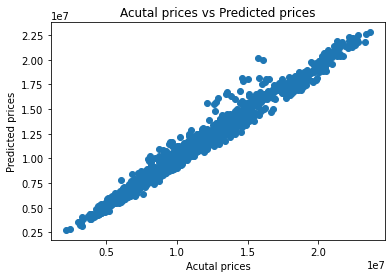

In [119]:
plt.scatter(y_test, y_pred)
plt.xlabel('Acutal prices')
plt.ylabel('Predicted prices')
plt.title("Acutal prices vs Predicted prices")
plt.show()

#**Analysing Scores of the Models**

1. Linear Regression R2 -SCORE: 0.94
2. Decision tree Regression :0.96
3. Ada Boost Regressor : 0.86
4. Gradient Boosting Regressor :0.97
5. XGB Regressor :0.97 
6. RMSLE :97

We can conclude that by using all these regressors Gradient Boosting regressor and XGB Regressor are giving the score of 97.

The Model that we have developed shows positive relation.The value predicted is very much similar to the actual price of the houses.